In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sn
from sklearn.metrics import accuracy_score
%matplotlib inline

# Reading dataset into a var

In [11]:
data_frame_1 = pd.read_csv('spambase.data')

In [12]:
data_frame_1

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [13]:
with open('./spambase.names') as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
data_frame_2 = pd.read_csv('./spambase.data', header=None, names=labels +['spam'])
data_frame_2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Cleaning duplicate values

In [14]:
data_frame_2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [15]:
data_frame_2.drop_duplicates(inplace=True)

In [16]:
data_frame_2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Visualizing outliers

<Figure size 7200x3600 with 0 Axes>

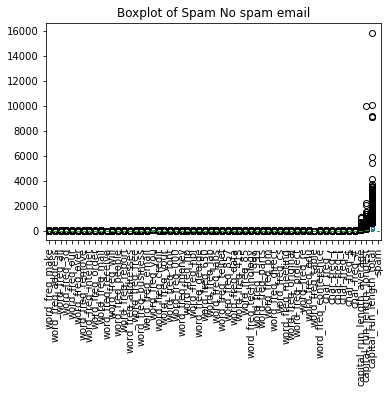

In [17]:
fig = plt.figure(figsize =(100, 50))
data_frame_2.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

<AxesSubplot:xlabel='capital_run_length_longest'>

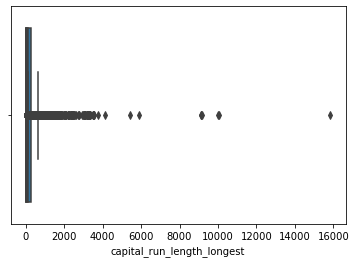

In [18]:
sn.boxplot(x = data_frame_2['capital_run_length_longest'])

<AxesSubplot:xlabel='capital_run_length_total'>

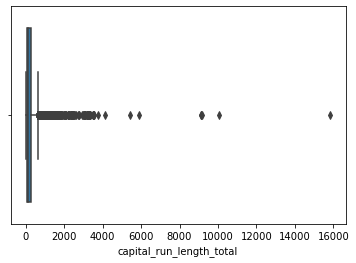

In [19]:
sn.boxplot(x = data_frame_2['capital_run_length_total'])

<AxesSubplot:xlabel='capital_run_length_average'>

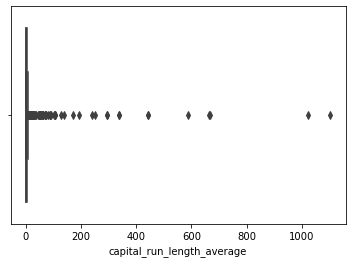

In [20]:
sn.boxplot(x = data_frame_2['capital_run_length_average'])

In [22]:
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(data_frame_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_frame_2.loc[data_frame_2[x] < min,x] = np.nan
    data_frame_2.loc[data_frame_2[x] > max,x] = np.nan

In [23]:
data_frame_2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,NaN,NaN,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,NaN,NaN,NaN,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0


In [25]:
data_frame_2.isna().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [26]:
# Null values dropping 
data_frame_3=data_frame_2.dropna()
data_frame_3=data_frame_2.dropna(axis=0)

data_frame_3=data_frame_2.dropna().reset_index(drop=True)

data_frame_2 = data_frame_3
data_frame_3

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


<AxesSubplot:xlabel='capital_run_length_longest'>

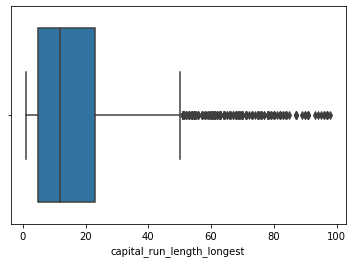

In [27]:
sn.boxplot(x = data_frame_2['capital_run_length_longest'])

<AxesSubplot:xlabel='capital_run_length_total'>

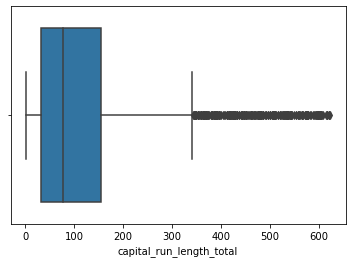

In [28]:
sn.boxplot(x = data_frame_2['capital_run_length_total'])

<AxesSubplot:xlabel='capital_run_length_average'>

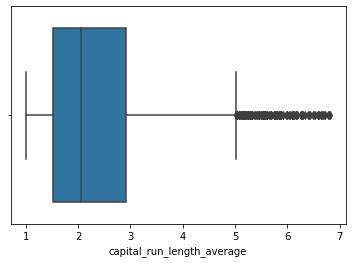

In [29]:
sn.boxplot(x = data_frame_2['capital_run_length_average'])

In [31]:
# Target variable defining
Y = data_frame_3.iloc[:, 57].values

In [32]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
# Input variables defining
X = data_frame_3.loc[:, data_frame_3.columns!='spam']

In [34]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0


In [35]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


In [37]:
#Standardize features by subtracting the mean and dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [39]:
data_frame_4=pd.DataFrame(data=scaled_data, columns= X.columns)
data_frame_4

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


In [40]:
data_frame_4.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,1.906919e-15,-4.400459e-16,6.484785e-16,-5.201674e-16,-4.045146e-15,-1.406014e-15,-1.210717e-14,1.584065e-15,4.067150e-15,-7.056650e-16,...,2.352788e-15,2.911178e-15,1.163286e-15,-1.355787e-15,-9.867405e-16,4.202739e-15,3.410247e-17,8.189747e-17,6.437103e-17,-1.803871e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


# Principal Componant Annalysis (PCA) 

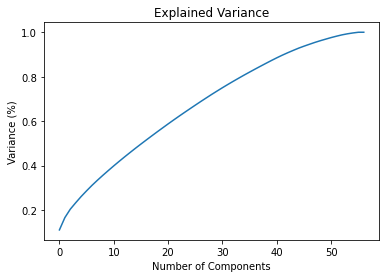

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data_frame_4)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [42]:
# Higher variances and selecting 45 components dropping out  
pca = PCA(n_components=45)
new_data = pca.fit_transform(data_frame_4)

data_frame_5 = pd.DataFrame(data = new_data)

In [43]:
data_frame_5

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.006857,1.802152,0.718604,0.075095,-0.217662,-0.058672,-1.193210,-0.852862,1.060014,0.868121,...,0.225173,0.054724,0.543341,-0.015611,0.163450,-0.110126,0.044798,-0.535502,-0.319661,-0.516043
1,-0.985097,1.538500,0.306285,-0.027349,-0.287019,-0.185409,-0.690244,0.207728,-0.356707,-0.197870,...,-0.600516,0.333885,0.342038,-0.794588,0.292980,-0.134570,0.074947,0.328598,-0.536784,-0.597338
2,-0.986344,1.538184,0.305695,-0.026639,-0.287298,-0.184837,-0.690856,0.206859,-0.356980,-0.199416,...,-0.599422,0.331393,0.344954,-0.795772,0.294290,-0.132260,0.074403,0.327966,-0.536368,-0.596662
3,-0.589457,-0.147097,-0.010577,0.294636,-0.673058,-0.411104,0.165604,0.738231,-1.293650,-0.064182,...,-1.154122,1.043272,0.806735,-0.762543,1.203978,0.437197,-0.706735,0.287455,-0.543900,-0.852778
4,-1.147370,0.762938,-1.665262,0.687300,-0.063360,1.574470,-1.343796,-0.179879,-0.196710,-0.557087,...,-0.336368,1.360053,-0.602297,0.106185,0.537091,0.400867,1.110387,-0.398307,0.419825,-0.010627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.541647,-1.320158,-0.551831,0.452444,-0.288103,-0.497819,0.169144,0.147473,0.376756,-0.867532,...,0.472387,0.451920,-0.338732,-0.312262,-0.304083,0.255522,-0.393125,0.156775,0.328406,0.069295
3442,-0.934433,-0.987027,-1.271985,-0.126776,1.537214,-0.243504,-0.066386,0.812478,0.844489,-0.507208,...,0.439706,-0.279580,0.525628,1.114298,0.493479,-0.992939,0.111051,0.164329,-0.051438,-0.448257
3443,-0.279227,-0.860494,-0.162324,0.119447,0.155816,-0.202293,0.133921,-0.148510,1.331356,-0.828537,...,0.496880,1.001215,-1.004826,0.378720,-0.561887,-0.698253,-0.593449,0.173477,-0.022645,-0.650955
3444,-0.713477,-1.124775,-0.833386,0.310051,0.308562,-0.316076,-0.124856,0.220845,0.415800,-0.398619,...,-0.206318,0.036685,0.915735,-0.093340,0.186038,-0.436070,-0.195040,-0.242033,-0.131557,0.008990


# K Nearest Neighbor (KNN) 

In [44]:
# Train test 
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_frame_5, Y, test_size = 0.25, random_state = 0)

In [45]:
# Fitting classifier 
# p stands for euclidian distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
classifier.fit(train_X,train_Y)

KNeighborsClassifier(metric='euclidean')

In [46]:
# Test data (Accuracy)
classifier.score(test_X,test_Y)

0.8932714617169374

In [47]:
# Predicting the Test set results
Y_pred = classifier.predict(test_X)

In [48]:
# Traing data (Accuracy)
predictions_train_knn = classifier.predict(train_X)
accuracy_score(train_Y, predictions_train_knn)

0.9287925696594427

# Confusion matrix for KNN

In [50]:
from sklearn.metrics import confusion_matrix
c_matrix1 = confusion_matrix(test_Y, Y_pred)
c_matrix1

array([[543,  26],
       [ 66, 227]])

Text(42.0, 0.5, 'Truth')

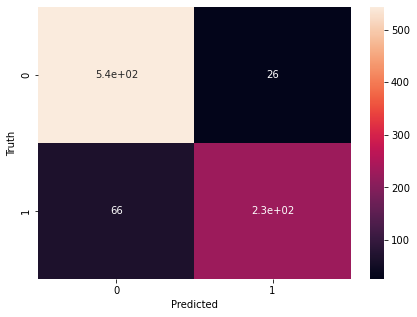

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(c_matrix1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification report for KNN

In [55]:
from sklearn.metrics import classification_report
report_KNN = classification_report(test_Y, Y_pred)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       569
           1       0.90      0.77      0.83       293

    accuracy                           0.89       862
   macro avg       0.89      0.86      0.88       862
weighted avg       0.89      0.89      0.89       862



# Decition Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
trainset_X, testset_X, trainset_Y, testset_Y = train_test_split(data_frame_5, Y, test_size=0.3, random_state=3)

In [59]:
# defining decition tree classifier and took a lower value to max depth parameter to reduce overfitting 
classifier_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
classifier_DT

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
# training decition (tree classifier)
classifier_DT.fit(trainset_X,trainset_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
# Test data (accuracy)
test_predic = classifier_DT.predict(testset_X)
accuracy_score(testset_Y, test_predic)

0.8936170212765957

In [62]:
# Train data (accuracy)
train_predic = classifier_DT.predict(trainset_X)
accuracy_score(trainset_Y,train_predic)

0.8731343283582089

In [64]:
predTree = classifier_DT.predict(testset_X)

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy of the above trained decition tree is : ", metrics.accuracy_score(testset_Y, predTree))

Accuracy of the above trained decition tree is :  0.8936170212765957


In [66]:
Y_pred_dt = classifier_DT.predict(testset_X)

# Confusion matrix for decition tree

In [67]:
from sklearn.metrics import confusion_matrix
c_matrix2 = confusion_matrix(testset_Y, Y_pred_dt)
c_matrix2

array([[683,  31],
       [ 79, 241]])

Text(42.0, 0.5, 'Truth')

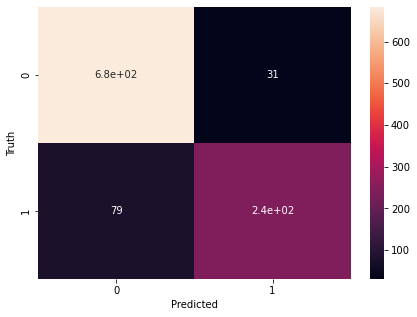

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(c_matrix2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification report for decition tree

In [69]:
DT_report = classification_report(testset_Y, Y_pred_dt)
print(DT_report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       714
           1       0.89      0.75      0.81       320

    accuracy                           0.89      1034
   macro avg       0.89      0.85      0.87      1034
weighted avg       0.89      0.89      0.89      1034



# Visualizing decision tree

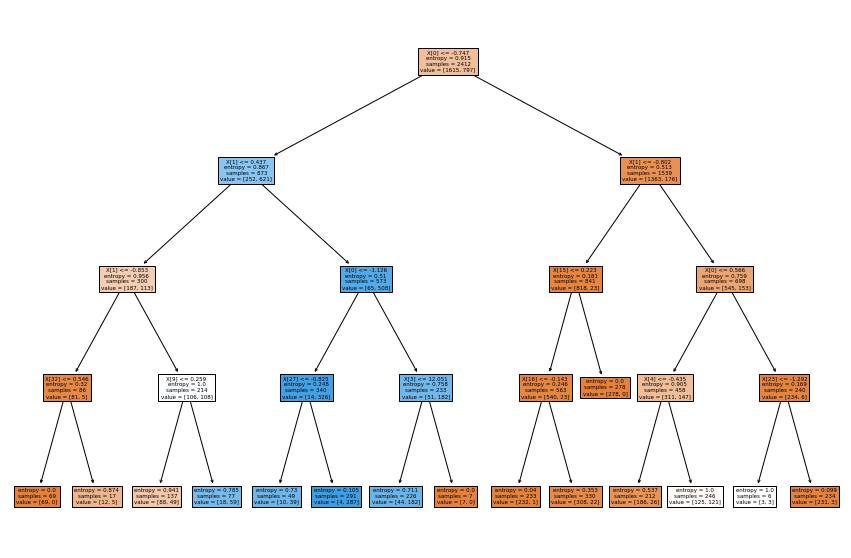

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_DT,filled=True)
plt.show()

In [72]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [74]:
probs_DT = classifier_DT.predict_proba(testset_X)[:,1]
probs_DT

array([0.12264151, 0.9862543 , 0.79591837, ..., 0.00429185, 0.00429185,
       0.12264151])

In [75]:
fpr_DT, tpr_DT, thresholds_DT = roc_curve(testset_Y,probs_DT)

# Plotting ROC curve

In [76]:
auc_score_DT = auc(fpr_DT,tpr_DT)
auc_score_DT

0.9398503151260504

In [77]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_DT, tpr_DT, color='orange', label='AUC = %0.2f' % auc_score_DT)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

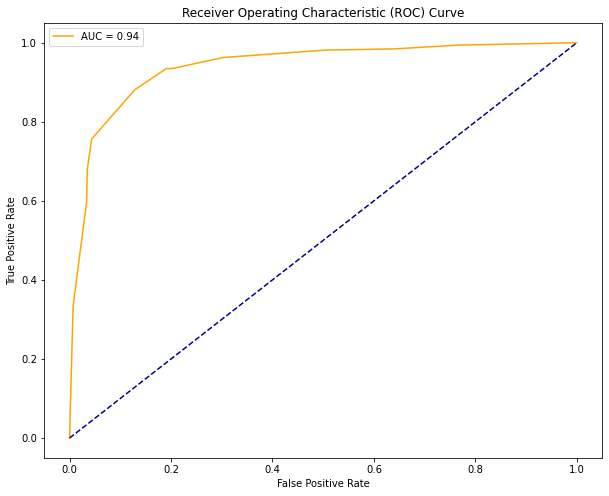

In [78]:
plot_roc_curve(fpr_DT,tpr_DT)